<img src="https://upload.wikimedia.org/wikipedia/commons/f/f3/W._P._Carey_School_of_Business_logo.png" width=15% align=left> <br><br>
<img src="" width =80%>

<!-- <h1 style="text-align: center;color:#8C1D40"> CAR PRICE PREDICTION </h1> -->
<!-- <hr> -->

## Table of Content: <a class="anchor" id="table-of-content"></a>
* [1. Problem Background and Motivation](#problem-background)
* [2. Import Package](#import-package)
* [3. Custom Functions](#custom-functions)
* [4. Connect to Data Source and Data Extraction](#data-extraction)
* [5. Data Exploration, Data Transformation](#data-transformation)
* [6. Machine Learning Model](#ml-model)
* [7. Conclusion](#conclusion)


## 1. Problem Background and Motivation <a class="anchor" id="problem-background"></a>

### Problem Statement
> The likelihood that a customer will cancel a reservation before checking into a hotel is predicted by this model. A model that can anticipate if a guest will actually arrive would be fantastic for hotels. This might assist a hotel in making the appropriate plans. Perhaps some hotels employ a similar strategy by advertising more rooms than they actually have, increasing revenue. <br>

### TO-DO
>- Data Cleaning
>- Transforming variables
>- feature selection
>- Run various Models 
>- Check performance and select a wining model.



* [Go to Top](#table-of-content)

## 2. Import Package <a class="anchor" id="import-package"></a>
<br>

### Libraries<br>

>**Numpy, Pandas and Math:**<br>
We use it to import the data files which has multi-dimensional arrays and matrices and for data manipulations  <br>

>**Matplotlib, Seaboen and Plotly:**<br>
These libraries are used for data visualization

>**SKLearn:**<br>
Sklearn provides multiple machine learning and statistical models to which can best describe the pattern in the data. It also provides metrics toevaluate the performance of the model    <br>

>**Statsmodels:**<br>
Statsmodels is used for statistical tests on statistical data explorations <br>


* [Go to Top](#table-of-content)

In [1]:
# data manipulation libraries
import pandas as pd
pd.set_option('display.max_columns',None)
pd.options.display.float_format = '{:.4f}'.format 
import numpy as np
import math
    
# visualization libraries
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

# machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn import datasets
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.preprocessing import binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics





## 3. Custom functions <a class="anchor" id="custom-functions"></a>
User defined functions which will be used multiple times in the below notebook.

User defined functions:
1. **train_test_metrics** - function to get the evaluation metrics for Linear regression model


* [Go to Top](#table-of-content)

In [2]:
#### function to get the evaluation metrics for Linear regression model
def train_test_metrics(X_train,X_test,y_train,y_test,model):
    '''
    The function generates a dataframe of evaluation metrics for measuring linear regression performance. 
    '''
    
    names=['R2','Adj-R2','MAE','MAPE','MSE'] 
    
    # Training Metrics
    y_hat = model.predict(X_train)
    
    # Create R2
    r2 = r2_score(y_train,y_hat).round(3)
    
    # Create adj_R2
    adj_r2 = (1-(1-r2_score(y_train,y_hat))*(len(y_train)-1)/(len(y_train)-len(model.coef_)-1)).round(3)

    
    train_metrics = [r2, adj_r2,
                     mean_absolute_error(y_train,y_hat).round(3),
                     mean_absolute_percentage_error(y_train,y_hat).round(3)*100,
                     (mean_squared_error(y_train,y_hat)).round(3)
                    ]
    train_metrics = pd.DataFrame({'Train':train_metrics},index=names)
    
    # Testing Metrics
    y_hat = model.predict(X_test)
    test_metrics = [r2_score(y_test,y_hat).round(3),
                    (1-(1-r2_score(y_test,y_hat))*(len(y_test)-1)/(len(y_test)-len(model.coef_)-1)).round(3),
                    mean_absolute_error(y_test,y_hat).round(3),
                    mean_absolute_percentage_error(y_test,y_hat).round(3)*100,
                    (mean_squared_error(y_test,y_hat)).round(3)
                   ]
    test_metrics = pd.DataFrame({'Test':test_metrics},index=names)
    
    all_metrics = train_metrics.merge(test_metrics,left_index=True,right_index=True)
    display(all_metrics)

## 4. Connect to Data Source and Data Extraction <a class="anchor" id="data-extraction"></a>
1. The below cells loads the data from flat file and creates a source dataframe. 
2. We will be using the copied dataframe to analyze the data, feature selection and for running machine learning model.

| Source       	|                       	        |
|--------------	|-------------------------------	|
| File Name:   	| hotel_bookings.csv                 	        |


* [Go to Top](#table-of-content)

In [3]:
df_raw = pd.read_csv('hotel_bookings.csv')
df = df_raw.copy()
df.tail()

hotel  is_canceled  lead_time  arrival_date_year  \
119385  City Hotel            0         23               2017   
119386  City Hotel            0        102               2017   
119387  City Hotel            0         34               2017   
119388  City Hotel            0        109               2017   
119389  City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
119385                     5       2    0.0000       0   BB     BEL   
119386                     5       3    0.0000       0   BB     FRA   
119387                     5       2    0.0000       0   BB     DEU   
119388                     5       2    0.0000       0   BB     GBR   
119389                     7       2    0.0000       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
119385  Offline TA/TO                TA/TO                  0   
119386      Online TA                TA/TO                  0   
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
119385                       0                               0   
119386                       0                               0   
119387                       0                               0   
119388                       0                               0   
119389                       0                               0   

       reserved_room_type assigned_room_type  booking_changes deposit_type  \
119385                  A                  A                0   No Deposit   
119386                  E                  E                0   No Deposit   
119387                  D                  D                0   No Deposit   
119388                  A                  A                0   No Deposit   
119389                  A                  A                0   No Deposit   

          agent  company  days_in_waiting_list customer_type      adr  \
119385 394.0000      NaN                     0     Transient  96.1400   
119386   9.0000      NaN                     0     Transient 225.4300   
119387   9.0000      NaN                     0     Transient 157.7100   
119388  89.0000      NaN                     0     Transient 104.4000   
119389   9.0000      NaN                     0     Transient 151.2000   

        required_car_parking_spaces  total_of_special_requests  
119385                            0                          0  
119386                            0                          2  
119387                            0                          4  
119388                            0                          0  
119389                            0                          2

#### Inital Observation:
> **Total Records**: 119389 records <br>
> **Target Variable**: is_cancelled (cancellation status) <br>
>
> Data Definition

| Column Name       	|     Column Definition                 	        |
|--------------	|-------------------------------	|
| hotel  	| hotel type- city hotel/resort               	        |
| Lead_time| days between arrival and booking  |
|Arrival_date_year| Year in which the customer arrived |
|aarival_date_month| Month of arrival |
|arrival_date_week_number|Week of arrival |
|arrival_date_day_of_month|Date of arrival |
|Stays_in_weekend_nights|Number of nights stayed on weekends|
|stays_in_week_nights|Number of nights stayed on weekdays |
|adults|number of adults |
|children|number of children occupants|
|babies|number of occupants that are babies|
|meal|Type of meal |
|country|country of booking|
|market_segment|type of market that the booking was made by |
|distribution_channel|type of distribution channel|
|is_repeated_guest|indicates if the guest is reapititive |
|previous_cancellations|indicates if the guest is has prior cancellations |
|previous_booking_not_cancelled|indicates if the guest has no cancellation record |
|reserved_roon_type|type of room reserved by the guest at the time of booking |
|assigned_room_type|type of room assigned at the time of arrival |
|booking_changes|any kind of changes in  the booking |
|deposit_type|type of desposit made at the time of booking |
|agent|Id of travel agent that made the booking |
|company|ID of company that made the booking |
|days_in_waitinglist|number of days the booking was in waiting list |
|customer_type|type of booking |
|adr|average daily rate |
|required_car_parking_space| if the guest requires a parking space|
|total_of_special_request|number of request made by the guest |

In [4]:
# check data type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## 5. Data Exploration, Data Transformation <a class="anchor" id="data-transformation"></a>

1. [Initial Cleanup - dupes, missing values](#initial-cleanup)
2. [Outlier Detection & Treatment](#outlier-detection)
3. [Feature Creation](#feature-creation)
4. [Feature Selection](#feature-selection)
5. [Feature Transformations](#feature-transformations)
6. [Data Partitioning](#data-split)

* [Go to Top](#table-of-content)

### 5.1 Initial Cleanup <a class="anchor" id="initial-cleanup"></a>
Remove Duplicates and missing values

* [Go to Data Exploration/Transformation](#data-transformation)
* [Go to Top](#table-of-content)

#### 5.1.2 Review data type of columns
Python selects the data type for the columns while loading the data. Update the data type if there is any issue

In [5]:
# df.info()

>year column is loaded as integer data type. Convert to categorical column so that year is not included while analyzing numerical data types

In [6]:
df['arrival_date_year'] = df['arrival_date_year'].astype('object')

#### 5.1.3 Drop duplicate rows

In [7]:
# remove duplicates
print('number of records',len(df))

df = df.drop_duplicates()

print('number of records after deleting duplicates',len(df))

number of records 119390
number of records after deleting duplicates 87138


#### 5.1.4 Check for Null values

In [8]:
df.isnull().sum()     

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             451
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12160
company                           81890


In [9]:
df.describe(include='all').T   

count unique         top       freq  \
hotel                               87138      2  City Hotel      53253   
is_canceled                    87138.0000    NaN         NaN        NaN   
lead_time                      87138.0000    NaN         NaN        NaN   
arrival_date_year              87138.0000 3.0000   2016.0000 42269.0000   
arrival_date_month                  87138     12      August      11237   
arrival_date_week_number       87138.0000    NaN         NaN        NaN   
arrival_date_day_of_month      87138.0000    NaN         NaN        NaN   
stays_in_weekend_nights        87138.0000    NaN         NaN        NaN   
stays_in_week_nights           87138.0000    NaN         NaN        NaN   
adults                         87138.0000    NaN         NaN        NaN   
children                       87134.0000    NaN         NaN        NaN   
babies                         87138.0000    NaN         NaN        NaN   
meal                                87138      5          BB      67785   
country                             86687    177         PRT      27292   
market_segment                      87138      8   Online TA      51502   
distribution_channel                87138      5       TA/TO      68914   
is_repeated_guest              87138.0000    NaN         NaN        NaN   
previous_cancellations         87138.0000    NaN         NaN        NaN   
previous_bookings_not_canceled 87138.0000    NaN         NaN        NaN   
reserved_room_type                  87138     10           A      56344   
assigned_room_type                  87138     12           A      46110   
booking_changes                87138.0000    NaN         NaN        NaN   
deposit_type                        87138      3  No Deposit      86014   
agent                          74978.0000    NaN         NaN        NaN   
company                         5248.0000    NaN         NaN        NaN   
days_in_waiting_list           87138.0000    NaN         NaN        NaN   
customer_type                       87138      4   Transient      71856   
adr                            87138.0000    NaN         NaN        NaN   
required_car_parking_spaces    87138.0000    NaN         NaN        NaN   
total_of_special_requests      87138.0000    NaN         NaN        NaN   

                                   mean      std     min     25%      50%  \
hotel                               NaN      NaN     NaN     NaN      NaN   
is_canceled                      0.2728   0.4454  0.0000  0.0000   0.0000   
lead_time                       79.7201  85.9442  0.0000 11.0000  49.0000   
arrival_date_year                   NaN      NaN     NaN     NaN      NaN   
arrival_date_month                  NaN      NaN     NaN     NaN      NaN   
arrival_date_week_number        26.8364  13.6746  1.0000 16.0000  27.0000   
arrival_date_day_of_month       15.8144   8.8352  1.0000  8.0000  16.0000   
stays_in_weekend_nights          1.0052   1.0315  0.0000  0.0000   1.0000   
stays_in_week_nights             2.6254   2.0516  0.0000  1.0000   2.0000   
adults                           1.8758   0.6268  0.0000  2.0000   2.0000   
children                         0.1389   0.4562  0.0000  0.0000   0.0000   
babies                           0.0109   0.1138  0.0000  0.0000   0.0000   
meal                                NaN      NaN     NaN     NaN      NaN   
country                             NaN      NaN     NaN     NaN      NaN   
market_segment                      NaN      NaN     NaN     NaN      NaN   
distribution_channel                NaN      NaN     NaN     NaN      NaN   
is_repeated_guest                0.0392   0.1940  0.0000  0.0000   0.0000   
previous_cancellations           0.0302   0.3693  0.0000  0.0000   0.0000   
previous_bookings_not_canceled   0.1845   1.7344  0.0000  0.0000   0.0000   
reserved_room_type                  NaN      NaN     NaN     NaN      NaN   
assigned_room_type                  NaN      NaN     NaN     NaN      NaN   
booking_changes 

In [10]:
# Country is combination of multiple categories. thus split the values to check unique values in the column.
df_temp = df.copy()

df_temp['country'] = df_temp['country'].str.split(',')

df_temp = df_temp.explode('country', ignore_index=True)
df_temp = df_temp.explode('country', ignore_index=True)
df_temp['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

**Country** <br>
>- country has a lot of categories. hence will be segregating it into 5 most used and others.
>- it has 488 missing rows, hence decided to drop the rows with missing values.

**Company**
>- company has a lot of missing values. hence, decided to drop the column

**agent**
>- agent seems to be relevant in determining the prediction variable is_cancelled.


In [11]:
df=df.drop(['company','agent'],axis=1)

print('Number of original records:', len(df))

# drop all rows that contain missing values
df= df.dropna()

print('Number of records after dropping missing values:', len(df))

Number of original records: 87138
Number of records after dropping missing values: 86683


> ~451 rows have been reduced after removing company,agent column and rows with null values

#### Initial Cleanup Summary
>1. Changed data type of Year column to Object.
>2. Deleted 32,252 duplicate rows from the data. 
>3. Dropped comapnay and agent column
>4. Deleted rows having null values in country column
>
>**Total Number of rows after cleanup = 86687**

### 5.2 Outlier Detection and Removal <a class="anchor" id="outlier-detection"></a>

* [Go to Data Exploration/Transformation](#data-transformation)
* [Go to Top](#table-of-content)

In [12]:
df['is_canceled'].value_counts()

0    62953
1    23730
Name: is_canceled, dtype: int64

In [13]:
guest_city = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
guest_city.columns = ['Country', 'No of guests']
guest_city

Country  No of guests
0       PRT         17662
1       GBR          8448
2       FRA          7104
3       ESP          5390
4       DEU          4334
..      ...           ...
160     ZMB             1
161     SYC             1
162     MDG             1
163     SMR             1
164     FRO             1

[165 rows x 2 columns]

In [14]:
numerical_vars= ['is_canceled','lead_time','total_of_special_requests','required_car_parking_spaces','booking_changes',
'previous_cancellations','is_repeated_guest','adults','previous_bookings_not_canceled',
'days_in_waiting_list','adr','babies','stays_in_week_nights','arrival_date_week_number',
'arrival_date_day_of_month','children','stays_in_weekend_nights']

In [15]:
#df


### 5.3 Feature Creation <a class="anchor" id="feature-creation"></a>

1. Create new features based on current data
2. Reduce the number of unique values (if possible)

* [Go to Data Exploration/Transformation](#data-transformation)
* [Go to Top](#table-of-content)

> **CATEGORY COLUMN** <BR> <a class="anchor" id="feature_creation_brand_category"></a>
>Country can divided into the following columns
> 1. PRT
> 2. GBR
> 3. FRA
> 4. ESP
> 5. Others
>    

    
* [Go to Appendix](#appendix) for further details

### 5.4 Feature selection <a class="anchor" id="feature-selection"></a>
Select the features on which Price is dependent. Feature selection is divided into:
1. [Numerical features](#numerical-feature-selection)
2. [Categorical Features](#categorical-feature-selection)

* [Go to Data Exploration/Transformation](#data-transformation)
* [Go to Top](#table-of-content)

#### 5.4.1 Numerical Feature Selection <a class="anchor" id="numerical-feature-selection"></a>

In [16]:
target_variable = 'is_canceled'

a = df.select_dtypes(include ='number').corr()[[target_variable]].drop(target_variable).round(2)

fig = px.bar(x=a.is_canceled[:],y=a.index[:],data_frame=a, orientation='h',color=a.is_canceled[:],
             color_continuous_scale=px.colors.sequential.Viridis,
             title='Correlation between Numerical variables & (target variable)'
            )
fig.show()

>**Note:** <br>
>Selected Numerical features:
> 1. require_car_parking_spaces (exclude at it shows very low correlation with is_canceled.)
> 2. Lead_time (can be included)
> 3. adr (can be included)
> 4. arrival_date_week_number (exclude as it shows no correlation)
> 5. adults (can be included)
> 6. arrival_date_year (can be included) 

>
> - **change_ in_room** show a **negative correlation** because if there ws a change in room it could lead to booking cancellation. <br>
> - **Stay_in_week_nights and Stay_in_weekend_nights** show a **positive correlation** as days of stay in might determine if the booking is canceled or not. <br>
>
> Drop total_of_special_requests, required_car_parking_spaces, booking_chnages, arrival_date_week number. 

In [17]:
df = df.drop(['total_of_special_requests', 'required_car_parking_spaces', 'booking_changes', 'arrival_date_week_number'],axis=1)

In [18]:
df.select_dtypes(include=np.number).nunique()
#df.head()

is_canceled                          2
lead_time                          479
arrival_date_day_of_month           31
stays_in_weekend_nights             15
stays_in_week_nights                33
adults                              14
children                             5
babies                               5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
days_in_waiting_list               128
adr                               8870
dtype: int64

#### 5.4.2 Categorical Feature Selection <a class="anchor" id="categorical-feature-selection"></a>

In [19]:
df.select_dtypes(include='object').nunique()

hotel                     2
arrival_date_year         3
arrival_date_month       12
meal                      5
country                 177
market_segment            7
distribution_channel      5
reserved_room_type       10
assigned_room_type       12
deposit_type              3
customer_type             4
dtype: int64

<AxesSubplot:xlabel='meal', ylabel='count'>

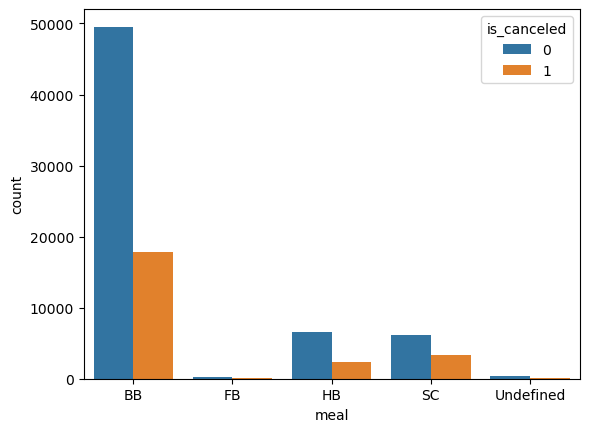

In [20]:
sns.countplot(data=df, x='meal', hue='is_canceled')

In [21]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'days_in_waiting_list',
       'customer_type', 'adr'],
      dtype='object')

**Feature Selection Summary**

Following features have been selected based on their predicting power to predict is_canceled.

> **Numerical Features:**
> 1. adults
> 2. Lead_time 
> 3. adr 
> 4. stay_in_weekend_nights
> 5. stay_in_week_nights
> 6. chilren
> 7. days_in_waiting_list
>
> **Categorical variables:**
> 1. 'hotel'
> 2. 'customer_type'
> 3. 'deposit_type' 
> 4. 'arrival_date_month'
> 5. 'distribution_channel'
> 6. 'Country'
> 7. 'Change_in room'


In [22]:
#df.columns

### 5.5 Feature Transformations <a class="anchor" id="feature-transformations"></a>
>To Do:<br>
> 1. Encode categorical variables
> 2. Drop useless variables
> 3. Rescale numerical features (apart from target variable)

* [Go to Data Exploration/Transformation](#data-transformation)
* [Go to Top](#table-of-content)

#### 5.5.1 Encode categorical variables

In [23]:
month_map = {'January':'01', 'February':'02', 'March':'03', 'April':'04', 'May':'05', 'June':'06', 'July':'07', 'August':'08', 'September':'09', 'October':'10', 'November':'11', 'December':'12'}
df.arrival_date_month = df.arrival_date_month.map(month_map).astype(int)

In [24]:
keep = df['country'].value_counts().index[:4]
df['country'] = np.where(df['country'].isin(keep), df['country'], 'OTHER')
keep = df['meal'].value_counts().index[:1]
df['meal'] = np.where(df['meal'].isin(keep), df['meal'], 'OTHER')

In [25]:
def roomChange(row):
    if row['assigned_room_type'] == row['reserved_room_type']:
        return 0
    else:
        return 1

df['change_in_room'] = df.apply(roomChange, axis=1)

In [26]:
lb = LabelEncoder()
var = ['hotel', 'customer_type', 'deposit_type', 'country', 'arrival_date_year','meal' ]
for item in var:
    df[item] = lb.fit_transform(df[item])
df = pd.get_dummies(df, columns=['hotel', 'customer_type', 'deposit_type', 'country',  'arrival_date_year', 'meal'])

> *Description of aabove steps*
>
> **Country and Room Change** <br>
>- Top 3 Countries were used and rest were labeled as others.
>- if assigned room type was similar to reserved room type 

>**Assessment of Categorical Variables:**<br>
<br>
>Variables that seem to matter<br>
>1. **meal** (5 unique values) - created a simplified category for fuel type
>2. **country** (only 4 unique values)
>3. **arrival date month** (only 12 unique values)
>4. **reserved_room_type and assigned_room_type** (drop since we already created cxhange in room)
>5. **Market_segment**(drop since checked further and does not seem relevant)
<br>

In [27]:
df=df.drop(['reserved_room_type','assigned_room_type','market_segment','distribution_channel'],axis=1)

In [28]:
print('number of records',len(df))

df = df.drop_duplicates()
df= df.dropna()

print('number of records after deleting duplicates',len(df))

number of records 86683
number of records after deleting duplicates 84023


In [29]:
df

is_canceled  lead_time  arrival_date_month  arrival_date_day_of_month  \
0                 0        342                   7                          1   
1                 0        737                   7                          1   
2                 0          7                   7                          1   
3                 0         13                   7                          1   
4                 0         14                   7                          1   
...             ...        ...                 ...                        ...   
119385            0         23                   8                         30   
119386            0        102                   8                         31   
119387            0         34                   8                         31   
119388            0        109                   8                         31   
119389            0        205                   8                         29   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  \
0                             0                     0       2    0.0000   
1                             0                     0       2    0.0000   
2                             0                     1       1    0.0000   
3                             0                     1       1    0.0000   
4                             0                     2       2    0.0000   
...                         ...                   ...     ...       ...   
119385                        2                     5       2    0.0000   
119386                        2                     5       3    0.0000   
119387                        2                     5       2    0.0000   
119388                        2                     5       2    0.0000   
119389                        2                     7       2    0.0000   

        babies  is_repeated_guest  previous_cancellations  \
0            0                  0                       0   
1            0                  0                       0   
2            0                  0                       0   
3            0                  0                       0   
4            0                  0                       0   
...        ...                ...                     ...   
119385       0                  0                       0   
119386       0                  0                       0   
119387       0                  0                       0   
119388       0                  0                       0   
119389       0                  0                       0   

        previous_bookings_not_canceled  days_in_waiting_list      adr  \
0                                    0                     0   0.0000   
1                                    0                     0   0.0000   
2                                    0                     0  75.0000   
3                                    0                     0  75.0000   
4                                    0                     0  98.0000   
...                                ...                   ...      ...   
119385                               0                     0  96.1400   
119386                               0                     0 225.4300   
119387                               0                     0 157.7100   
119388                               0                     0 104.4000   
119389                               0                     0 151.2000   

        change_in_room  hotel_0  hotel_1  customer_type_0  customer_type_1  \
0                    0        0        1                0                0   
1                    0        0        1                0                0   
2                    1        0        1                0                0   
3                    0        0        1                0                0   
4                    0        0        1                0                0   
...                ...      ...      ...              ..

### 5.6 Train Test Split <a class="anchor" id="data-split"></a>

* [Go to Data Exploration/Transformation](#data-transformation)
* [Go to Top](#table-of-content)

In [30]:
X = df.drop(['is_canceled'],axis=1)

y = df['is_canceled']


# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=2)

In [31]:
features_means = X_train.mean()
features_std = X_train.std()

X_train = (X_train - features_means)/features_std
X_test = (X_test - features_means)/features_std

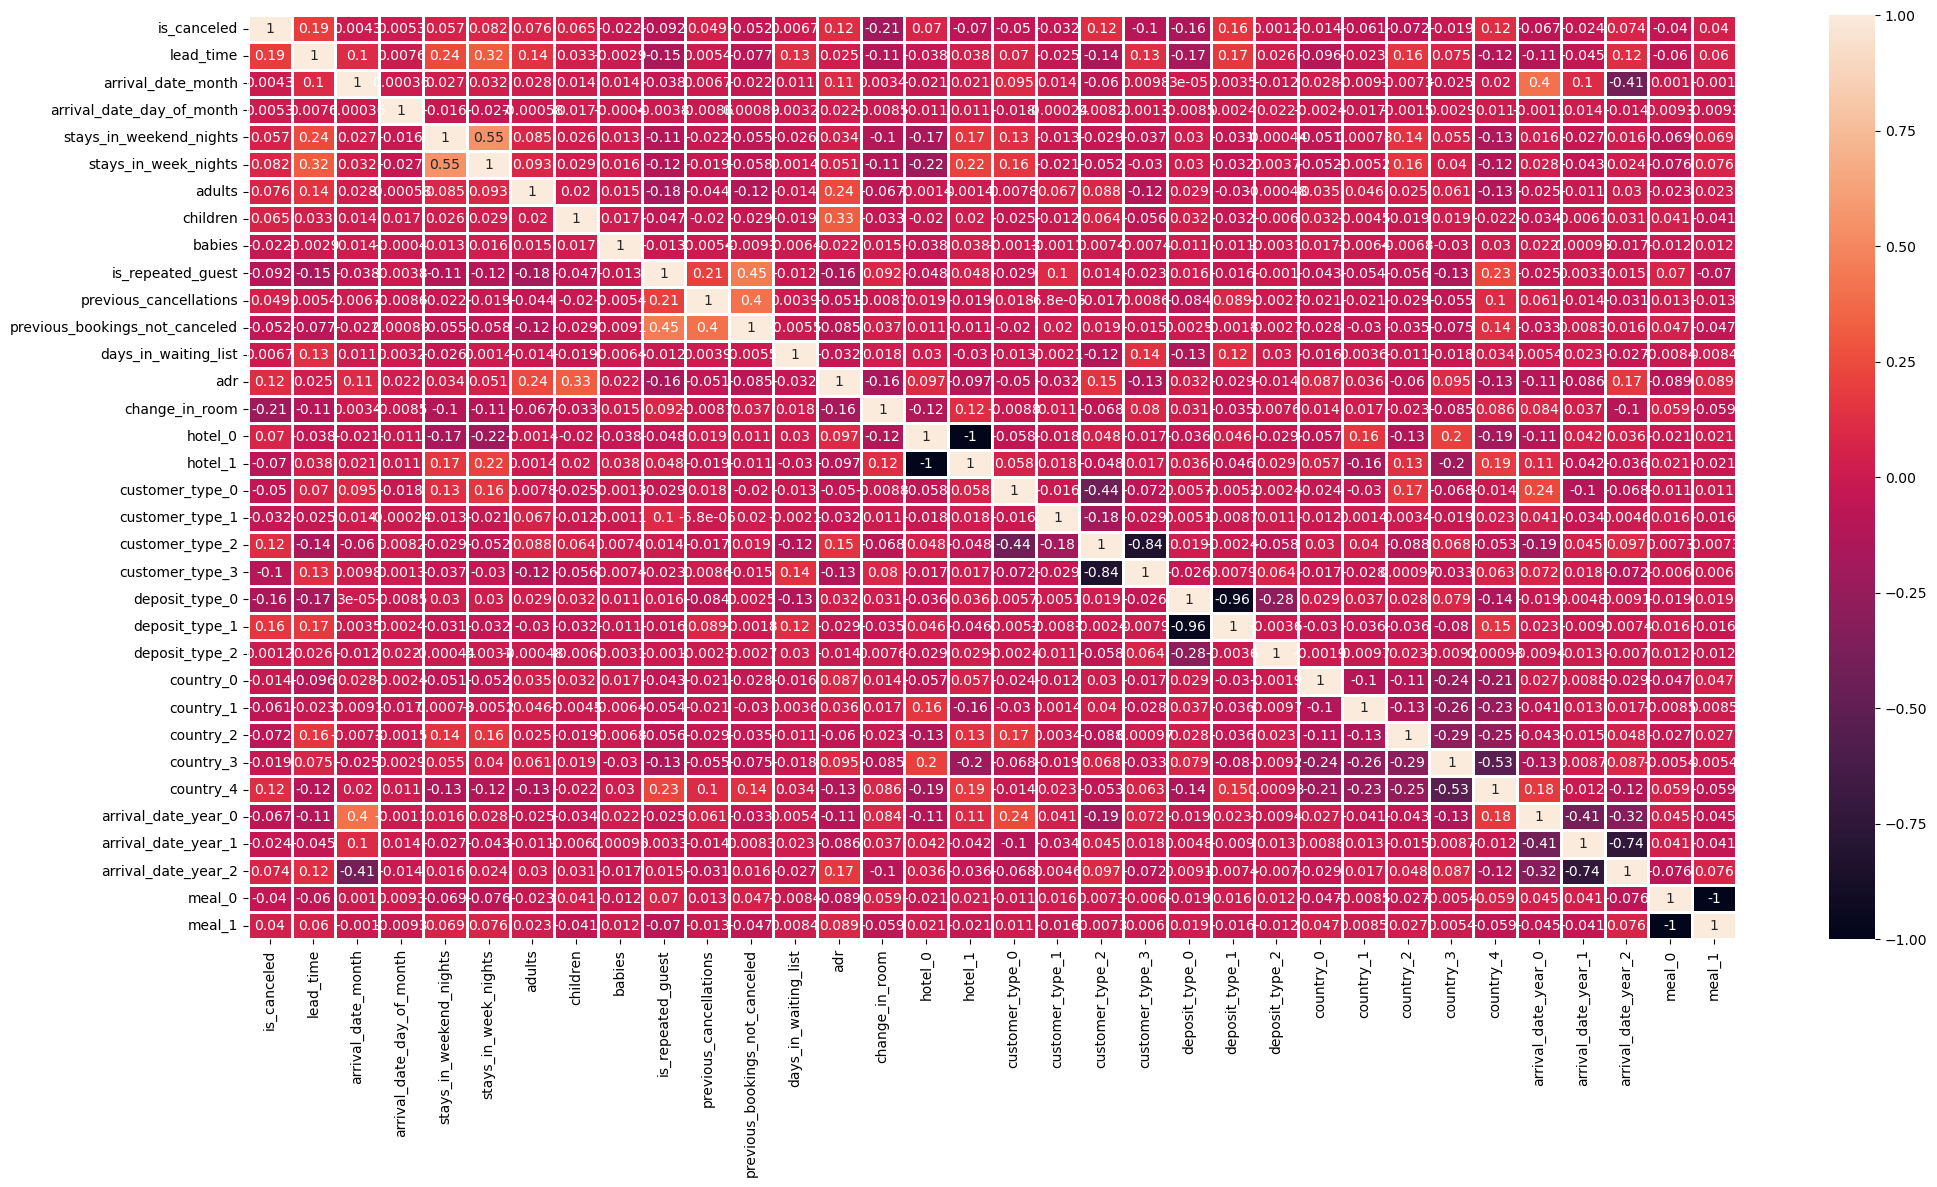

In [32]:
plt.figure(figsize = (24, 12))

corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

**Data Exploration/Transformation Summary**

> 1. changed year data type
> 2. checked for correlations with is_cancelled
> 3. removed duplicates and columns like company and agent
> 4. Checked correlation with Numerical vars
> 5. Dropped Vars with low correlation
> 6. checked count for ech country
> 7. Ckecked Count for Meals
> 8. Encoded Categorical Variables
> 9. Removed dulpicates and not required categorical variables.
> 10. test/traain spit
> 11. Normalized the data.

* [Go to Data Exploration/Transformation](#data-transformation)
* [Go to Top](#table-of-content)

# 6. Machine Learning <a class="anchor" id="ml-model"></a>

- [X] [Logistic Regression](#first-model)
- [X] [XGBoost CLassifier](#second-model)
- [X] [Decision Tree](#third-model)
- [X] [Random forest](#fourth-model)
- [X] [Nueral Nets](#fifth-model)


* [Go to Top](#table-of-content)

* [Go to Top](#table-of-content)

### Logistic Regression <a class="anchor" id="first-model"></a>


In [33]:

from sklearn.linear_model import LinearRegression, LogisticRegressionCV

In [34]:
 lr_model = LogisticRegression()
lr_model.fit(X_train,y_train.values.ravel())

y_train_pred_class = lr_model.predict(X_train)
y_test_pred_class = lr_model.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))


Training data Accuracy: 0.75
Testing data Accuracy: 0.75


In [35]:
#Define the alpha values to test
# Note that for whatever reason - penalty weights are inverted for LR (big numbers = smaller weight)
C = [10.0,1.0,0.1,0.001]

#Initialize a dataframe to store model coefficients
col = [X_train.columns]
ind = np.reciprocal(C)

coef_matrix = pd.DataFrame(index=ind, columns=col)

# Loop over all alpha values and run RidgeR
for i in range(4):
    ridge_lr = LogisticRegression(penalty='l2', C=C[i],solver='liblinear')
    ridge_lr.fit(X_train,y_train.values.ravel())
    coef_matrix.iloc[i,]=ridge_lr.coef_.round(2)
    
coef_matrix

lead_time arrival_date_month arrival_date_day_of_month  \
0.1000       0.4100             0.0100                   -0.0000   
1.0000       0.4100             0.0100                   -0.0000   
10.0000      0.4100             0.0100                   -0.0000   
1000.0000    0.3600             0.0100                    0.0000   

          stays_in_weekend_nights stays_in_week_nights adults children  \
0.1000                     0.0300               0.1000 0.0600   0.0600   
1.0000                     0.0300               0.1000 0.0600   0.0600   
10.0000                    0.0300               0.1000 0.0600   0.0600   
1000.0000                  0.0400               0.0900 0.0600   0.0600   

           babies is_repeated_guest previous_cancellations  \
0.1000    -0.0900           -0.2500                 0.5700   
1.0000    -0.0900           -0.2600                 0.5700   
10.0000   -0.0900           -0.2600                 0.5600   
1000.0000 -0.0700           -0.2000                 0.2600   

          previous_bookings_not_canceled days_in_waiting_list    adr  \
0.1000                           -0.5600              -0.0400 0.1400   
1.0000                           -0.5600              -0.0400 0.1400   
10.0000                          -0.5400              -0.0400 0.1400   
1000.0000                        -0.1900              -0.0300 0.1300   

          change_in_room hotel_0 hotel_1 customer_type_0 customer_type_1  \
0.1000           -0.6900  0.1100 -0.1100         -0.0700         -0.0500   
1.0000           -0.6900  0.1100 -0.1100         -0.0700         -0.0500   
10.0000          -0.6900  0.1100 -0.1100         -0.0700         -0.0500   
1000.0000        -0.4900  0.1000 -0.1000         -0.0600         -0.0400   

          customer_type_2 customer_type_3 deposit_type_0 deposit_type_1  \
0.1000             0.2000         -0.1800        -0.1700         0.1800   
1.0000             0.2000         -0.1800        -0.1700         0.1800   
10.0000            0.2000         -0.1800        -0.1700         0.1800   
1000.0000          0.1700         -0.1500        -0.1500         0.1600   

          deposit_type_2 country_0 country_1 country_2 country_3 country_4  \
0.1000           -0.0200    0.0200   -0.1800   -0.2000   -0.1300    0.3700   
1.0000           -0.0200    0.0200   -0.1800   -0.2000   -0.1300    0.3700   
10.0000          -0.0200    0.0200   -0.1800   -0.2000   -0.1200    0.3700   
1000.0000        -0.0200    0.0200   -0.1500   -0.1700   -0.1100    0.3200   

          arrival_date_year_0 arrival_date_year_1 arrival_date_year_2  meal_0  \
0.1000                -0.1400              0.0200              0.0800 -0.0200   
1.0000                -0.1400              0.0200              0.0800 -0.0200   
10.0000               -0.1400              0.0200              0.0800 -0.0200   
1000.0000             -0.1100              0.0100              0.0700 -0.0200   

          meal_1  
0.1000    0.0200  
1.0000    0.0200  
10.0000   0.0200  
1000.0000 0.0200

In [36]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [37]:
# Parameters we want to explore/evaluate
parameters = {
    'penalty':['10','l1','l2','13'],
    'C': np.logspace(-4,4,10),
    'solver': ['newton-cg','lbfgs','liblinear']
}

In [38]:
clf = GridSearchCV(lr_model,
                   param_grid = parameters,
                   scoring = 'accuracy',
                   cv = 10
                  )

best_lr = clf.fit(X_train,y_train.values.ravel())

print("Best Hyperparameters :", best_lr.best_params_)
print("Accuracy :", best_lr.best_score_)

Best Hyperparameters : {'C': 0.3593813663804626, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.7502720394476856


**Summary:**
>- Ran LogisticRegression with L2<br>
>- Did grid Search for various penalty weights<br>
>- Finally saw an accuracy of 75.36%<br>

### XGBoost Classifier <a class="anchor" id="second-model"></a>

>- Explored XGboost Classifier:<br>
>- Learnt about diffrent parameters<br>
>- Saw Feature importance with respect to F1 score<br>
>- Plotted the learning curve <br>
>
> Notes:<br>
>> learn about trees formation using XGboost <br>
>> explore more parameters<br>
>> explore how to tune more parameters<br>

In [39]:
import xgboost as xgb # XGBoost typically uses the alias "xgb"

Refer: https://xgboost.readthedocs.io/en/stable/parameter.html<br>
Refer: https://github.com/PriyankaAdiga/Hotel-Booking-Cancellation-Prediction/blob/main/Bookings_Priyanka.ipynb

In [40]:
# Instatiate a XGBClassifier and call it xgb_clf
xgb_clf = xgb.XGBClassifier(random_state=123)

# Inspect the parameters
xgb_clf.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 123,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [41]:
## Set max_depth to be 10 instead of 100
xgb_clf.set_params(n_estimators=10)

# Fit it to the training set
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
preds = xgb_clf.predict(X_test)

In [42]:
#calculating the accuracy
xgb1_accuracy = float(np.sum(preds==y_test))/y_test.shape[0]

#printing the baseline accuracy
print("Baseline accuracy:",xgb1_accuracy)


Baseline accuracy: 0.7591938747173405


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

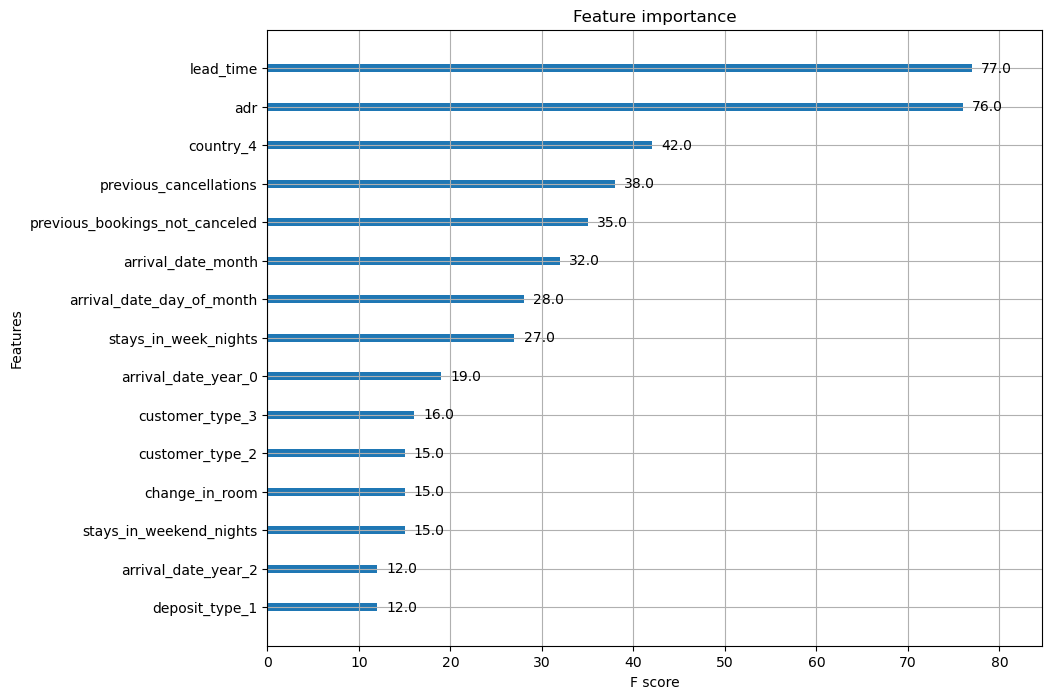

In [43]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 8)

xgb.plot_importance(xgb_clf, max_num_features = 15)

In [44]:
param_grid = {
    'max_depth': [10, 20, 30, 40],

    'alpha': [0.169,0.168, 0.165,0.166,0.167],
   
      'n_estimators': [10,25, 40],
    'max_leaf':[65,60,62,67]
}
xgb_clf_1 = xgb.XGBClassifier(random_state=123)
gridSearch = GridSearchCV(xgb_clf_1, 
                          param_grid, 
                          cv=5,
                          n_jobs=-1  #used to marshall all available CPUs
                         )
gridSearch.fit(X_train,y_train)

print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)


[17:25:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_leaf" } are not used.

Initial score:  0.7805699543196769
Initial parameters:  {'alpha': 0.167, 'max_depth': 10, 'max_leaf': 65, 'n_estimators': 40}


In [45]:
# XGBoost (different learning rate)
learning_rate_range = np.arange(0.01, 1, 0.05)
test_XG = [] 
train_XG = []
for lr in learning_rate_range:
    xgb_classifier = xgb.XGBClassifier(eta = lr)
    xgb_classifier.fit(X_train, y_train)
    train_XG.append(xgb_classifier.score(X_train, y_train))
    test_XG.append(xgb_classifier.score(X_test, y_test))

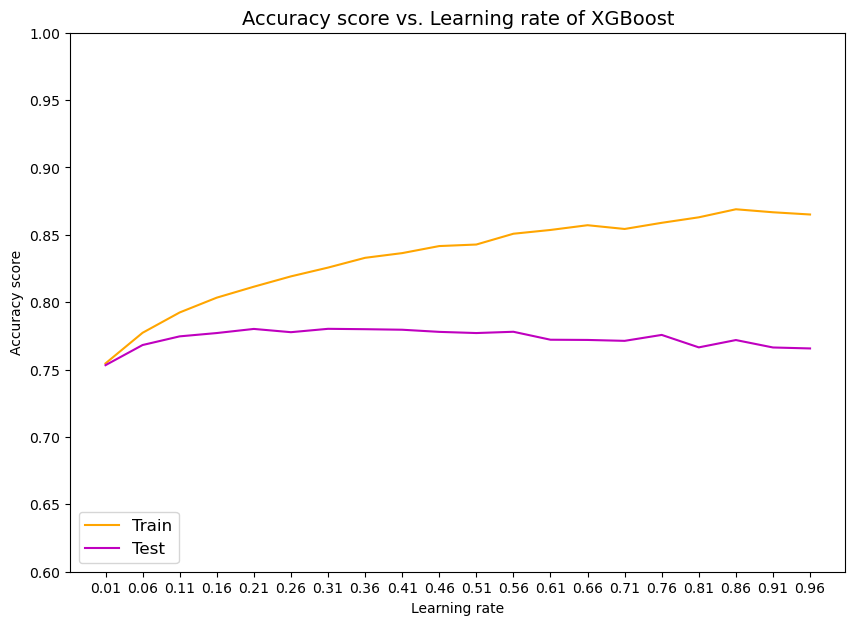

In [46]:
fig = plt.figure(figsize=(10, 7))
plt.plot(learning_rate_range, train_XG, c='orange', label='Train')
plt.plot(learning_rate_range, test_XG, c='m', label='Test')
plt.xlabel('Learning rate')
plt.xticks(learning_rate_range)
plt.ylabel('Accuracy score')
plt.ylim(0.6, 1)
plt.legend(prop={'size': 12}, loc=3)
plt.title('Accuracy score vs. Learning rate of XGBoost', size=14)
plt.show()


### Decision Tree <a class="anchor" id="third-model"></a>

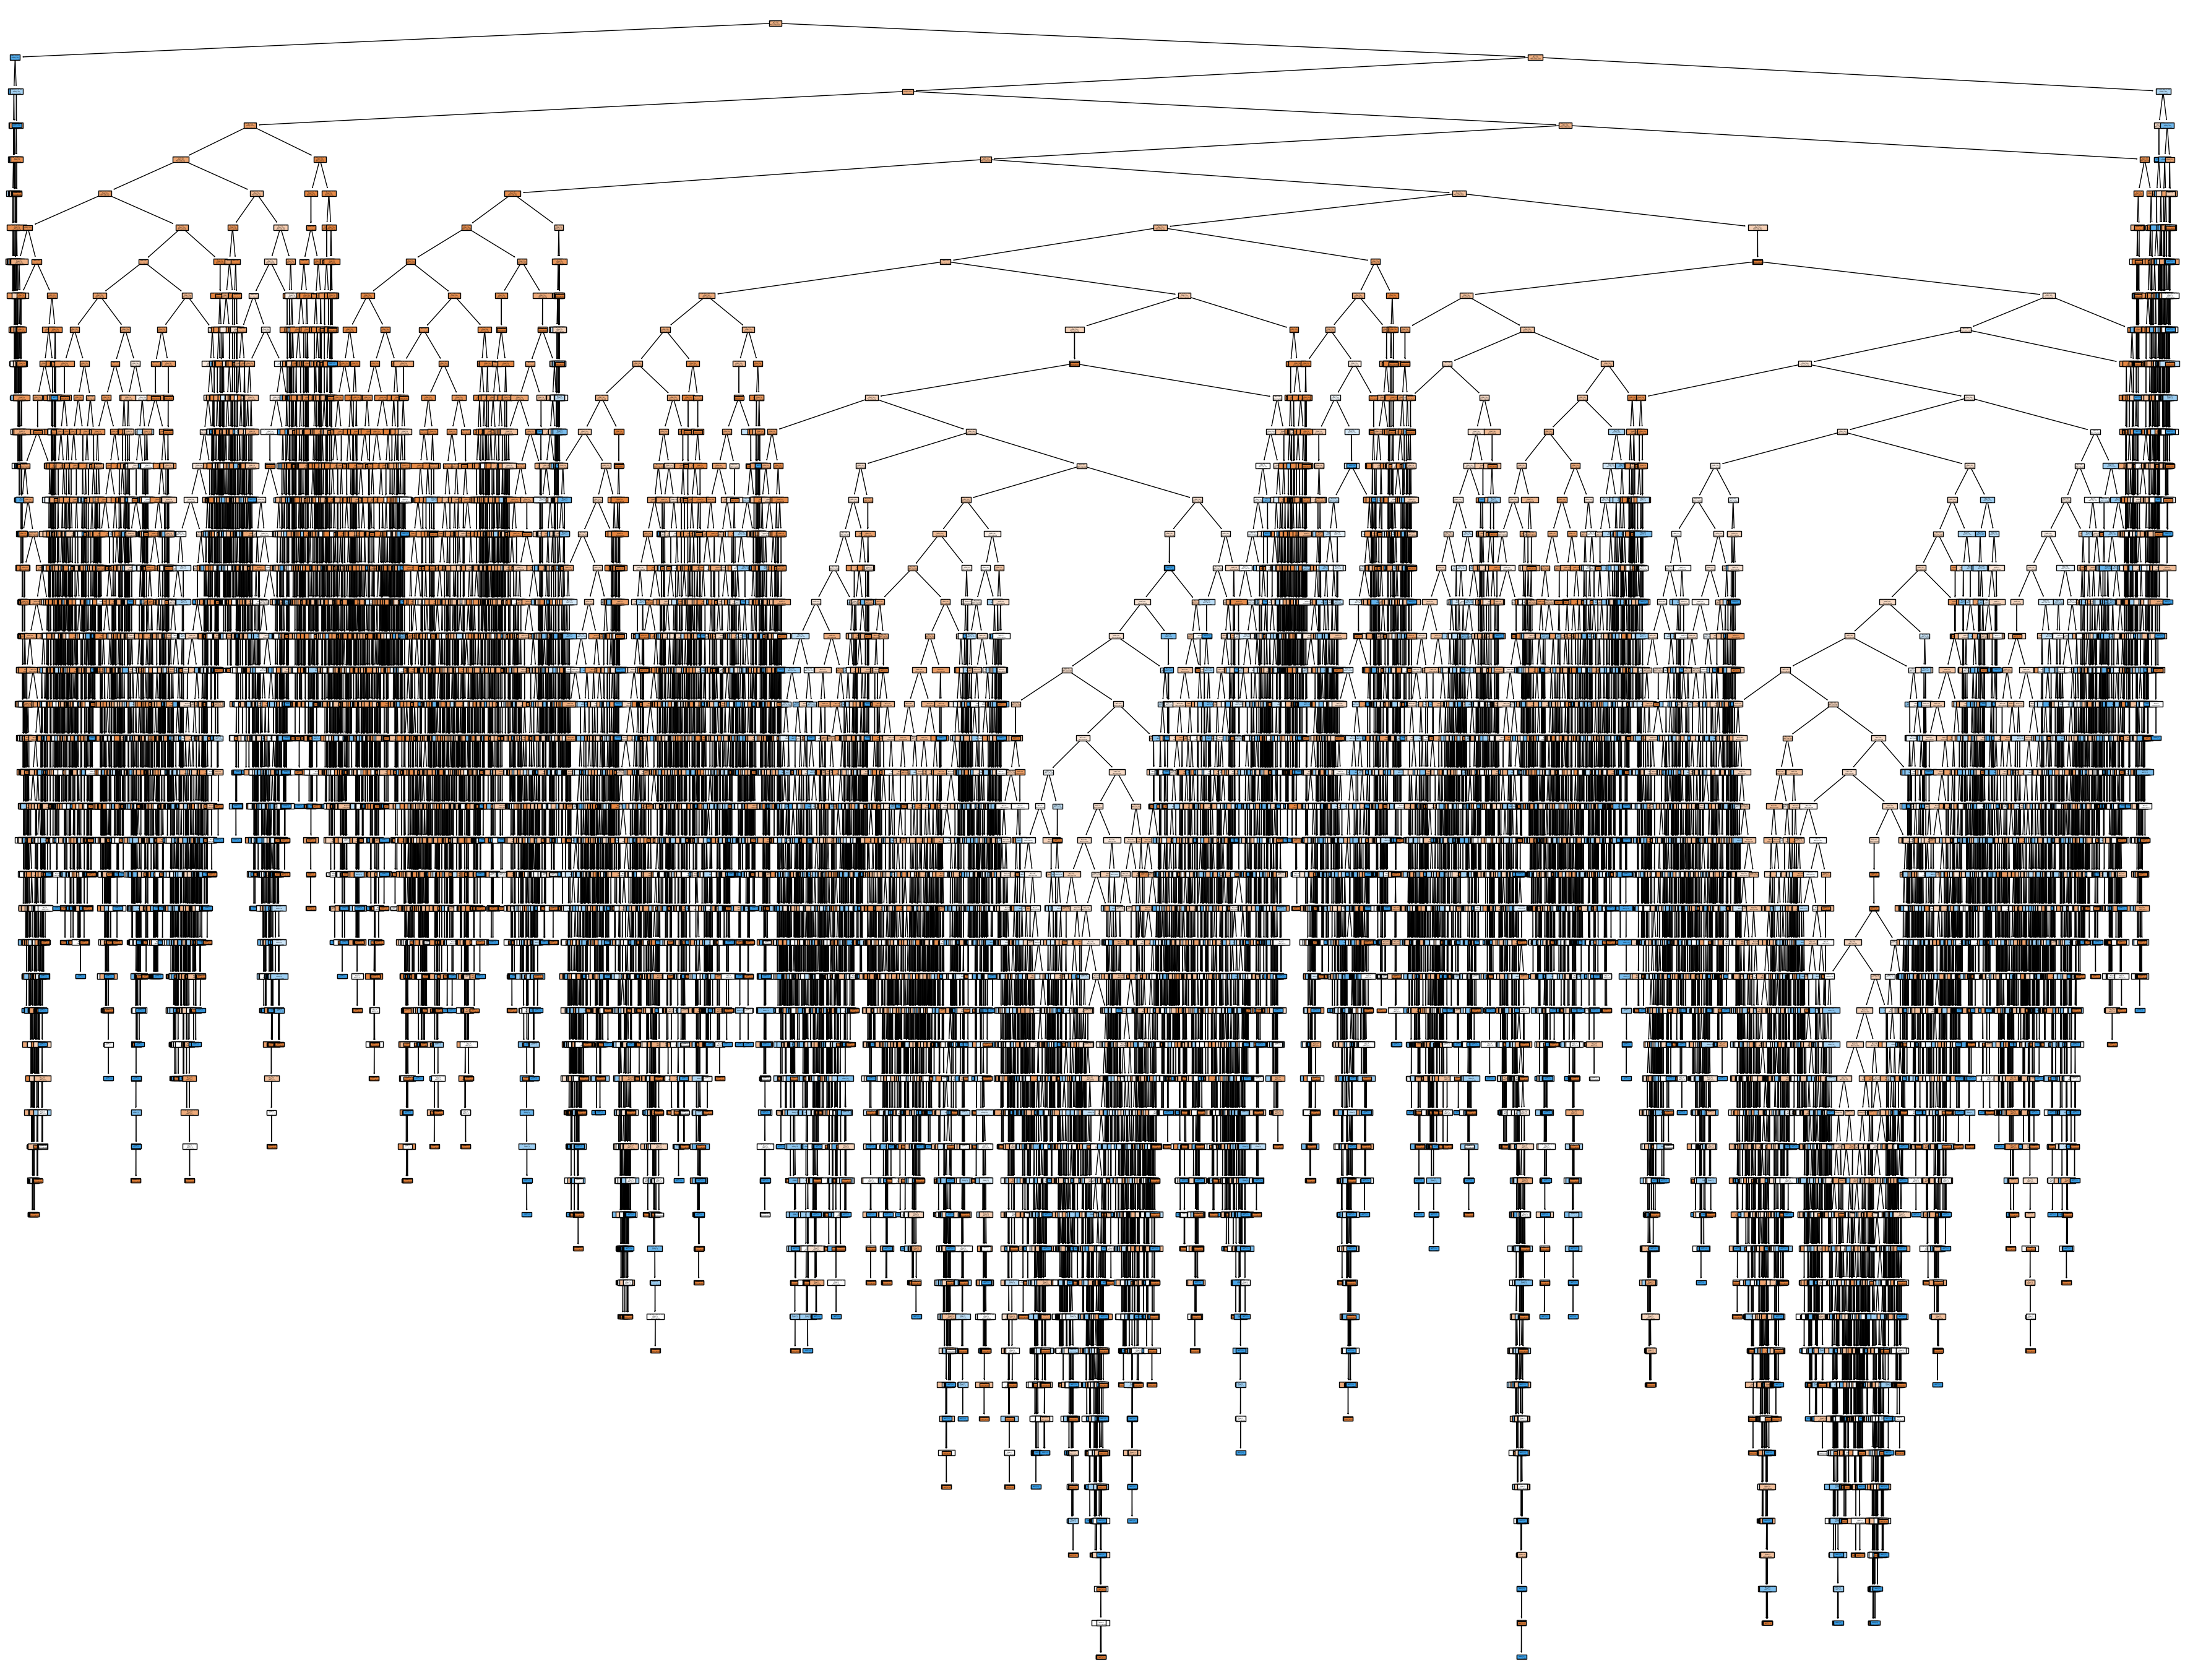

In [47]:
fullClassTree = DecisionTreeClassifier(random_state=123, max_features= 'auto')
fullClassTree.fit(X_train,y_train)

fig = plt.figure(figsize=(45,35))
tree.plot_tree(fullClassTree,
                   feature_names=X_train.columns,  
                   class_names=['is_canceled','not_canceled'],
                   filled=True
                  )
fig.show()

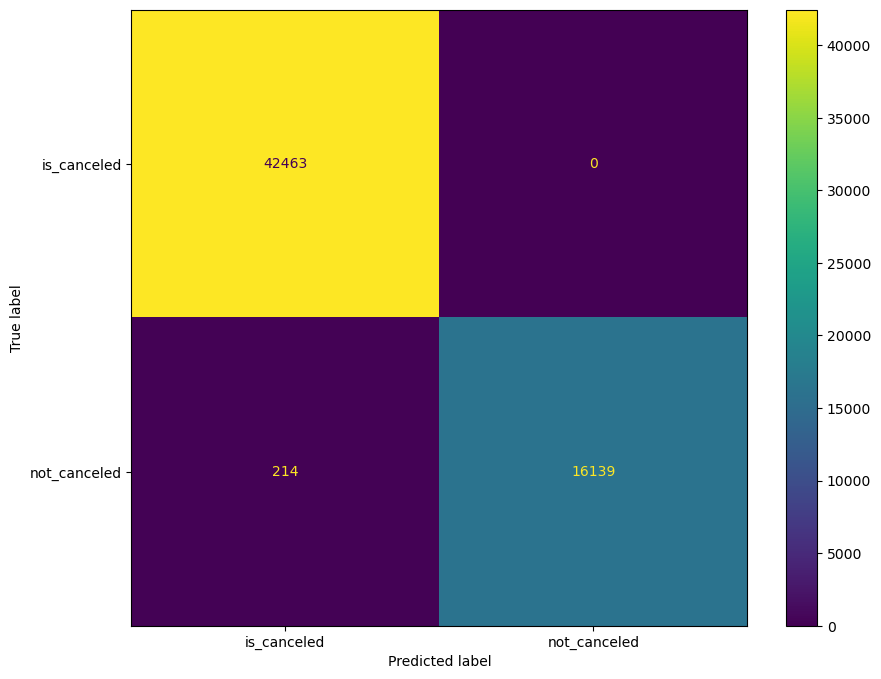

In [48]:
plot_confusion_matrix(fullClassTree,X_train,y_train,
                      display_labels=['is_canceled','not_canceled'])

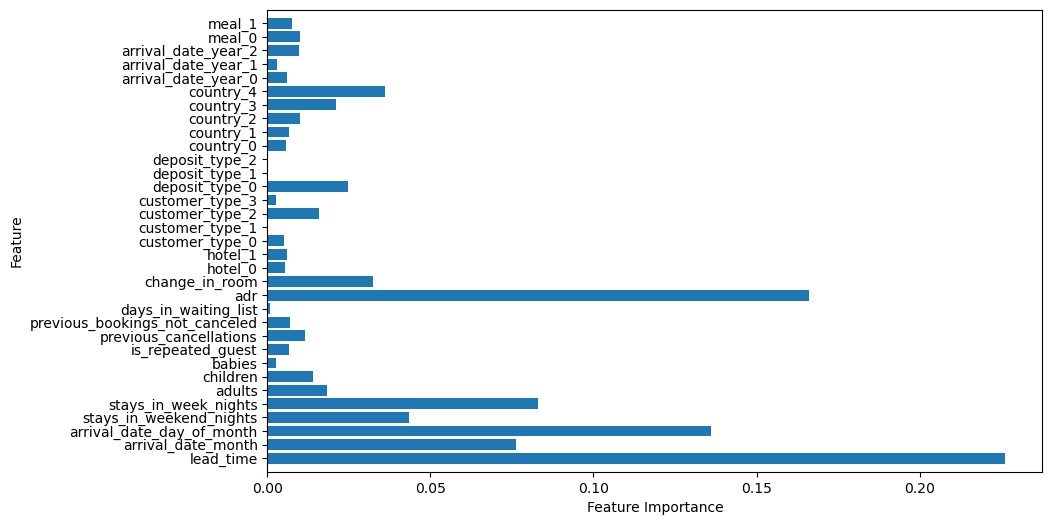

In [49]:
def plot_feature_importances(data,model):
    n_features = data.shape[1]
    fig = plt.figure(figsize=(10,6))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data.columns)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances(X_train,fullClassTree)

In [50]:
param_grid = {
    'max_depth': [8, 10, 20, 30, 40, 50],
    'min_samples_split': [20, 40, 60, 80, 100,120],
    'criterion': ['gini' , 'entropy'],
    'min_impurity_decrease': [ 0.0005, 0.001, 0.005, 0.01]
}

In [51]:
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1, max_features= 'auto'), 
                          param_grid, 
                          cv=5,
                          n_jobs=-1  #used to marshall all available CPUs
                         )
gridSearch.fit(X_train,y_train)

print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_) 

Initial score:  0.742502146915349
Initial parameters:  {'criterion': 'entropy', 'max_depth': 8, 'min_impurity_decrease': 0.001, 'min_samples_split': 20}


In [52]:
# Adapt grid based on findings in last cell
param_grid = {
    'max_depth': range(2,16,2),
    'min_samples_split': range(5,30,5),
    'criterion': ['gini' , 'entropy'],
    'min_impurity_decrease': [ 0.0007, 0.0009, 0.001, 0.0011],
    'ccp_alpha': [0.00005,0.0005,0.0009,0.0013]
}

In [53]:
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1, max_features= 'auto'), 
                          param_grid, 
                          cv=5,
                          n_jobs=-1  #used to marshall all available CPUs
                          
                         )
gridSearch.fit(X_train,y_train)

print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

Improved score:  0.7436921966401892
Improved parameters:  {'ccp_alpha': 0.0009, 'criterion': 'entropy', 'max_depth': 8, 'min_impurity_decrease': 0.0007, 'min_samples_split': 5}


In [54]:
bestClassTree = gridSearch.best_estimator_
trainScore= gridSearch.feature_names_in_

trainScore

array(['lead_time', 'arrival_date_month', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
       'children', 'babies', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'days_in_waiting_list', 'adr', 'change_in_room', 'hotel_0',
       'hotel_1', 'customer_type_0', 'customer_type_1', 'customer_type_2',
       'customer_type_3', 'deposit_type_0', 'deposit_type_1',
       'deposit_type_2', 'country_0', 'country_1', 'country_2',
       'country_3', 'country_4', 'arrival_date_year_0',
       'arrival_date_year_1', 'arrival_date_year_2', 'meal_0', 'meal_1'],
      dtype=object)

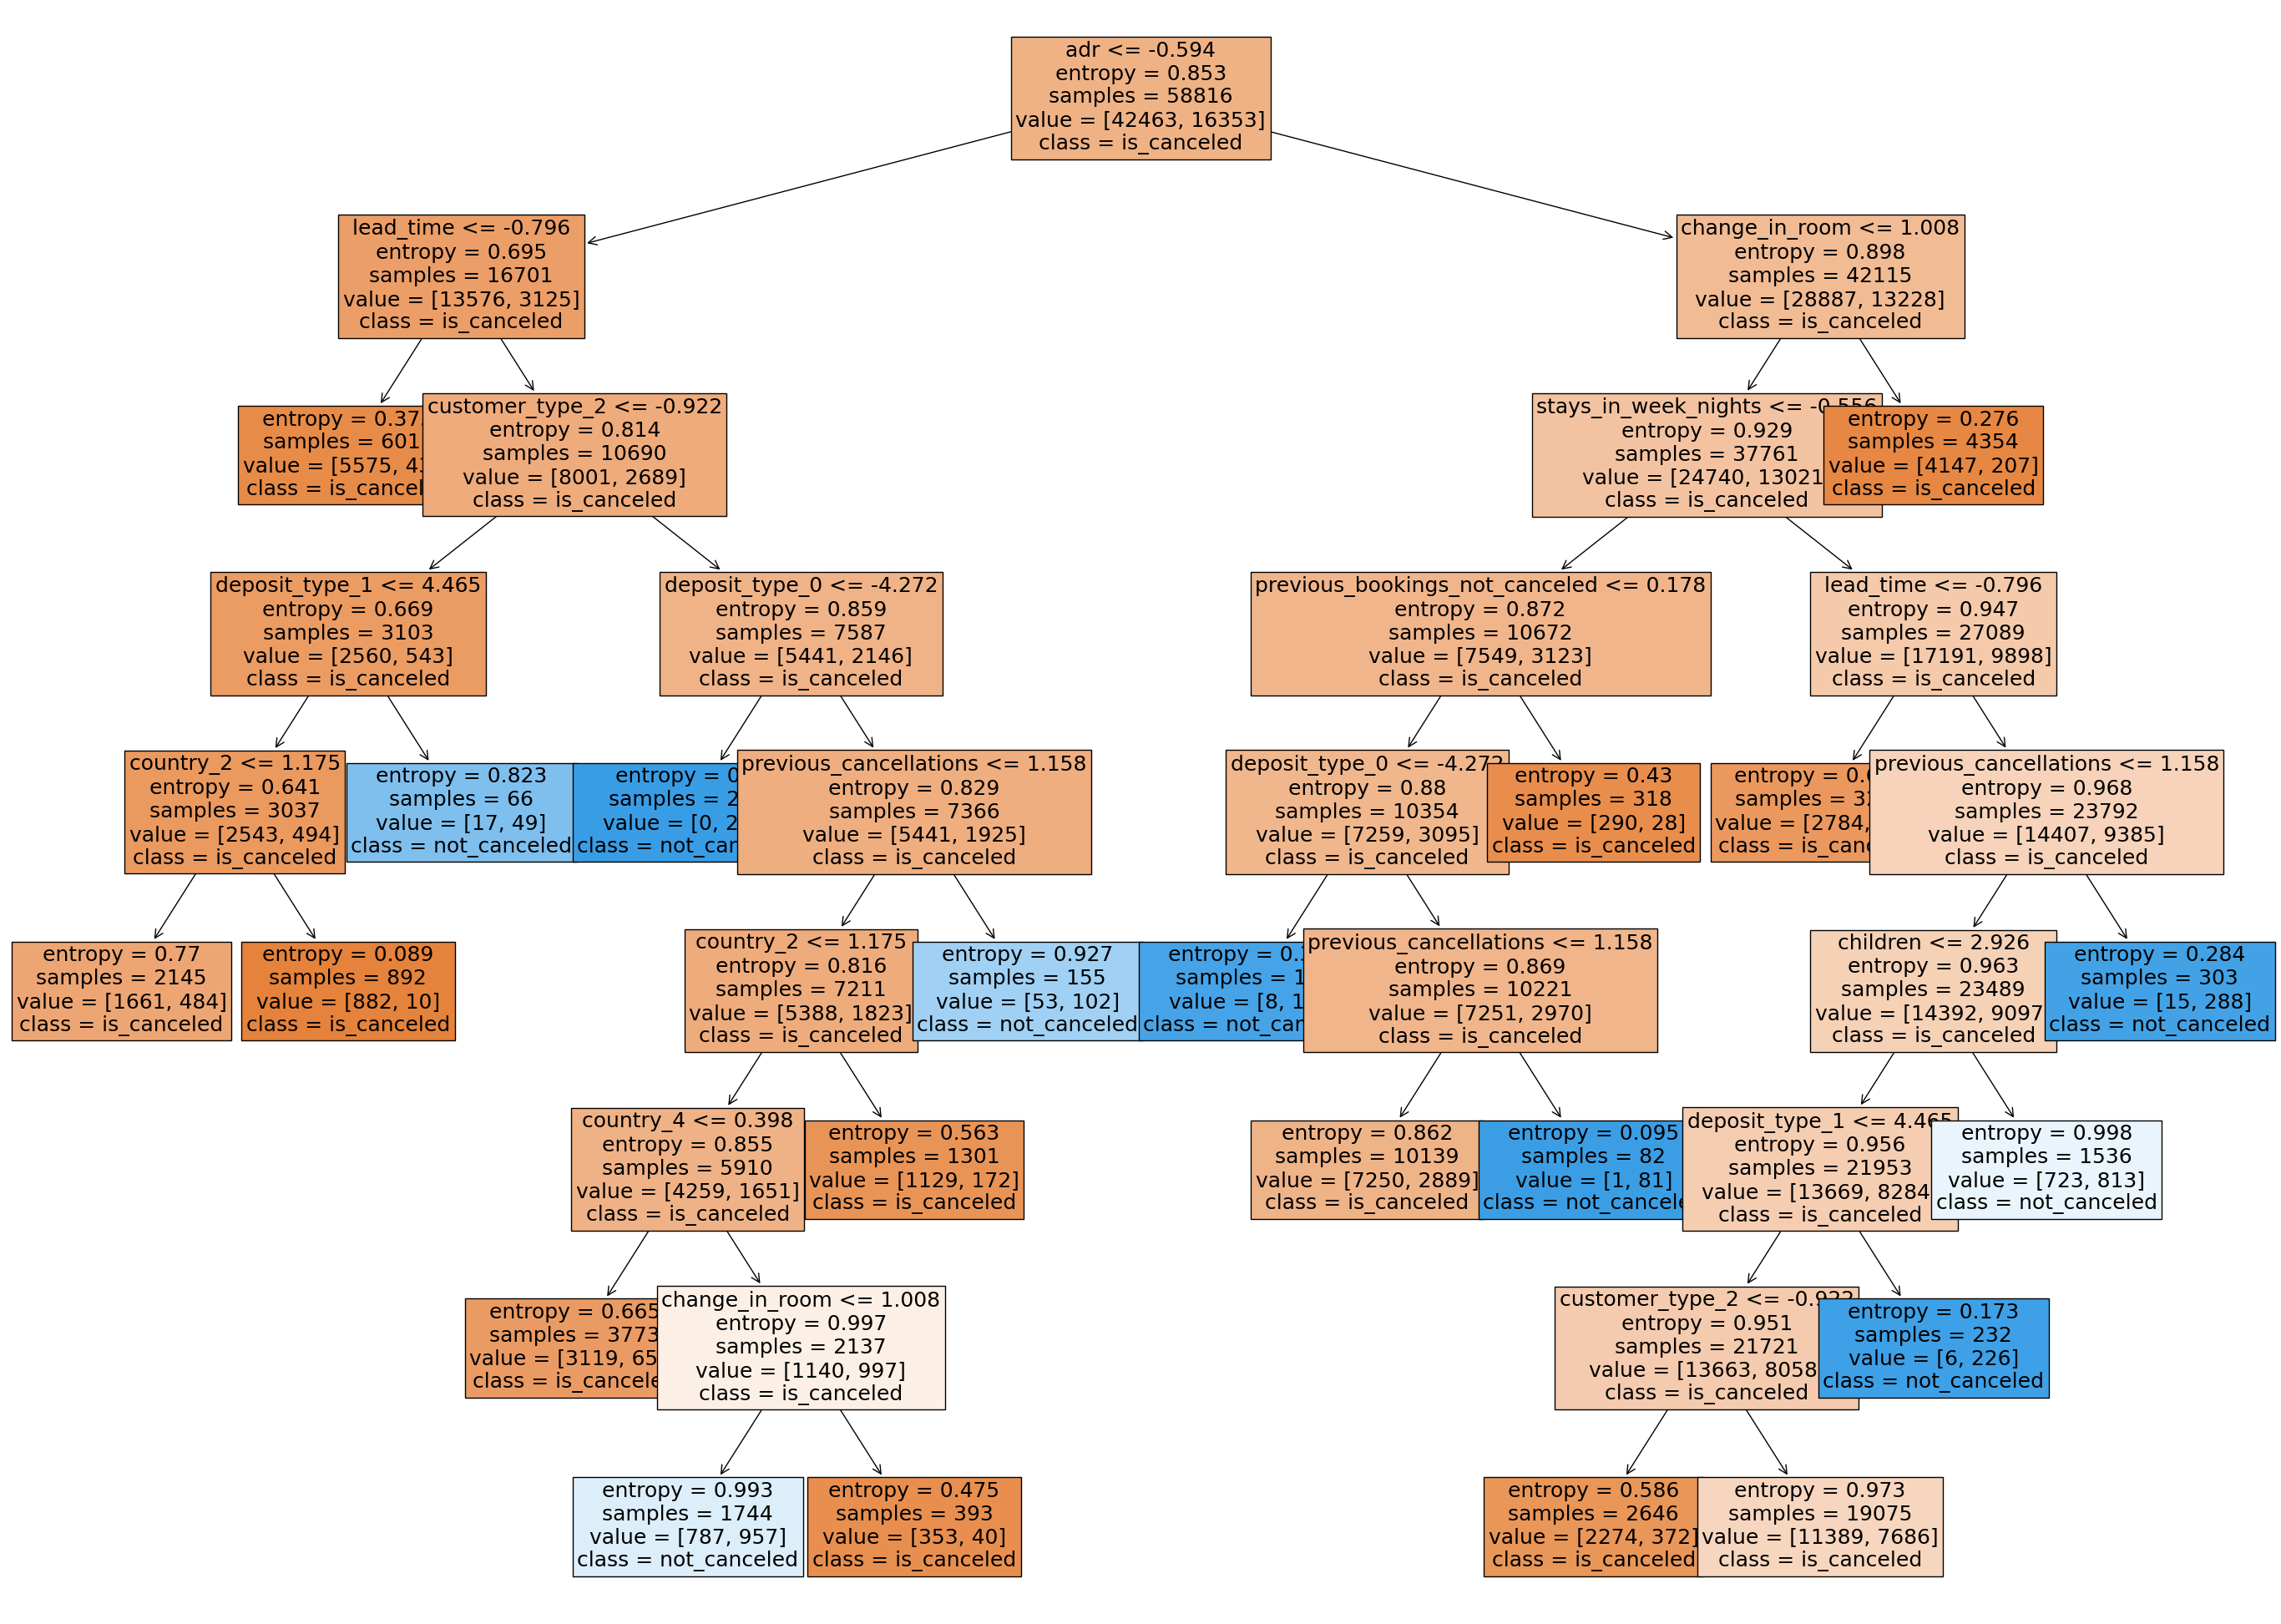

In [55]:
fig = plt.figure(figsize=(35,25))
tree.plot_tree(bestClassTree,
                   feature_names=X_train.columns,  
                   class_names=['is_canceled','not_canceled'],
                   filled=True,
                   fontsize=18
                  )
fig.show()

**Summary**
>- ran Decision tree, with Max-faetures 'auto' i.e. sqrt of number of features.
>- after the initial run decided to drop distibution channel column
>- later ran the model again with grid search
>- After the initial run ran grid search again with cost complexity pruning

### Random Forest <a class="anchor" id="fourth-model"></a>

In [56]:
model = RandomForestClassifier(n_estimators=100, max_depth=10,
                               max_features=20, random_state=0)

model.fit(X_train,y_train)

y_pred_prob = model.predict_proba(X_test)[:,1]
y_pred_class = binarize([y_pred_prob],threshold=0.5)[0]
confusion=confusion_matrix(y_test,y_pred_class)

print(metrics.accuracy_score(y_test,y_pred_class).round(2))

0.76


In [57]:
model = RandomForestClassifier(n_estimators=100, max_depth=20, 
                               max_features=30,random_state=0,
                               ccp_alpha=0.00008
                              )

model.fit(X_train,y_train)


y_pred_prob = model.predict_proba(X_test)[:,1]
y_pred_class = binarize([y_pred_prob],threshold=0.5)[0]
confusion=confusion_matrix(y_test,y_pred_class)

print(metrics.accuracy_score(y_test,y_pred_class).round(2))

0.78


In [58]:
importances = model.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)
forest_importances.sort_values(ascending=False)

lead_time                        0.2302
adr                              0.1272
change_in_room                   0.1046
country_4                        0.1027
customer_type_2                  0.0752
arrival_date_month               0.0498
arrival_date_day_of_month        0.0404
arrival_date_year_0              0.0393
stays_in_week_nights             0.0288
previous_cancellations           0.0276
previous_bookings_not_canceled   0.0240
deposit_type_0                   0.0167
deposit_type_1                   0.0162
stays_in_weekend_nights          0.0133
hotel_0                          0.0118
adults                           0.0117
hotel_1                          0.0110
arrival_date_year_1              0.0101
arrival_date_year_2              0.0097
customer_type_3                  0.0085
meal_0                           0.0080
children                         0.0074
meal_1                           0.0071
country_0                        0.0068
country_1                        0.0042


**Summary**
>- Ran random Forest classifier with some basic parameters
>- Later introduced cost complexity pruning and ran the model gain, gave an accuracy of 78%
>- the feature importance showed us that some features held 0 importance in the Model, hence removing them would have lowered our runtime for the model.

### Nueral Nets <a class="anchor" id="fifth-model"></a>

In [59]:
model = MLPClassifier(hidden_layer_sizes=(30,30,30), max_iter=1000,
                      activation='relu',
                      alpha=.01,
                      learning_rate= 'adaptive',
                      solver= 'lbfgs'
                     )

model.fit(X_train,y_train)

y_pred_prob = model.predict_proba(X_test)[:,1]
y_pred_prob_train = model.predict_proba(X_train)[:,1]
y_pred_class = binarize([y_pred_prob],threshold=0.5)[0]
y_pred_class_train = binarize([y_pred_prob_train],threshold=0.5)[0]
confusion_test=confusion_matrix(y_test,y_pred_class)
confusion_train=confusion_matrix(y_train,y_pred_class_train)

print('Train Accuracy: ',metrics.accuracy_score(y_train,y_pred_class_train).round(2))
print('Test Accuracy: ',metrics.accuracy_score(y_test,y_pred_class).round(2))
print('Train F1: ',metrics.f1_score(y_train,y_pred_class_train).round(2))
print('Test F1: ', metrics.f1_score(y_test,y_pred_class).round(2)) 

Train Accuracy:  0.81
Test Accuracy:  0.77
Train F1:  0.63
Test F1:  0.54


**summary**
>- Used Multi-Layer Preceptron Classifier, introduced parameters like hidden_layer(number of neurons),alpha(strength of L2 Regularization), activation(used rectified linear unit function), solver(lbfgs is an optimizer in the family of quasi-Newton methods),learning_rate(training loss keeps decreasing)<br>
>- After running the model got an accuracy of 81% which higher all the other models.<br>

>- notes:
> explore more parameters


## 7. Conclusion <a class="anchor" id="conclusion"></a>

>- Ran Machine Learning Models and found the accuracy for each, the best Model in terms of accuracy came out to be Nueral Nets with an accuracy score of about 82%  
>- Looked at the run time taken  by every model to run and found that nueral nets only took 4.2 mins.
>- **winning Model: Nueral Nets**

Notes:
>- Need to explore more parameters for XGboost Classifier
>- Skipped outlier removal as cleaning the data reduced the data by about 40,000. Wanted to run the model with certain features so that could see how the models behave and evaluate the run time for large dataset.
>- Run nueral nets too, by exploring more parameters.
>- need to learn about more classifiers like SVC.

* [Go to Top](#table-of-content)

## !! End !!